## Modelo de Regressão Linear - Baseline

### Serão construídos modelos baseline usando Algoritmo de Regressão Linear sem normalização de dados.

### Será usado algoritmo de Regularização Lasso para Feature Selection, incluíndo este resultado na lista de modelos.

#### Para métricas de avaliação dos modelos baseline serão usadas RMSE e R2.

##### Por se tratar de um modelo de baixa complexidade é bem provável que um algoritmo de Regressão Linear com escolhas de features alcance um bom resultado para baseline (acima de 70%). 

##### E também é bem provável que o uso de regularização LASSO não gere muita diferença diante poucas features e correlações bem definidas.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [2]:
# Imports
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import r2_score
import tools 
from sklearn.model_selection import cross_val_score
from datetime import datetime as dt
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Fabiano Fonseca - MLE" --iversions

Author: Fabiano Fonseca - MLE

numpy     : 1.19.1
pandas    : 1.3.5
matplotlib: 3.5.1



### Carregando dataset

In [4]:
size_dataset = 1000000
size_float = 32

In [5]:
csvFileName = "../data/data_fe_" + str(size_dataset) + "_20220320.csv"
df = pd.read_csv(csvFileName)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829515 entries, 0 to 829514
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         829515 non-null  int64  
 1   fare_amount        829515 non-null  float64
 2   pickup_longitude   829515 non-null  float64
 3   pickup_latitude    829515 non-null  float64
 4   dropoff_longitude  829515 non-null  float64
 5   dropoff_latitude   829515 non-null  float64
 6   passenger_count    829515 non-null  int64  
 7   hour               829515 non-null  int64  
 8   day_of_week        829515 non-null  int64  
 9   day_of_month       829515 non-null  int64  
 10  week               829515 non-null  int64  
 11  month              829515 non-null  int64  
 12  hour_norm          829515 non-null  float64
 13  cos_hour           829515 non-null  float64
 14  sin_hour           829515 non-null  float64
 15  day_of_week_norm   829515 non-null  float64
 16  co

In [7]:
if (size_float == 32):
    df = tools.reduce_size_features(df, verbose=True)
    df.info()

In [8]:
# Shape
df.shape

(829515, 25)

In [9]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,...,day_of_week_norm,cos_day_of_week,sin_day_of_week,day_of_month_norm,cos_day_of_month,sin_day_of_month,week_norm,cos_week,sin_week,distance_km
0,0,4.5,-73.844315,40.721317,-73.84161,40.712276,1,17,0,15,...,0.000000,1.0,0.000000e+00,3.040251,-0.994869,0.101168,2.963767,-0.984231,0.176890,1.0
1,1,16.9,-74.016045,40.711304,-73.97927,40.782005,1,16,1,5,...,1.047198,0.5,8.660254e-01,1.013417,0.528964,0.848644,0.118551,0.992981,0.118273,8.5
2,2,5.7,-73.982735,40.761270,-73.99124,40.750560,2,0,3,18,...,3.141593,-1.0,1.224647e-16,3.648301,-0.874347,-0.485302,3.912172,-0.717507,-0.696551,1.4
3,3,7.7,-73.987130,40.733143,-73.99157,40.758090,1,4,5,21,...,5.235988,0.5,-8.660254e-01,4.256352,-0.440394,-0.897805,1.896811,-0.320270,0.947326,2.8
4,4,5.3,-73.968094,40.768010,-73.95666,40.783764,1,7,1,9,...,1.047198,0.5,8.660254e-01,1.824151,-0.250653,0.968077,1.185507,0.375828,0.926690,2.0


In [10]:
# selecionando determinadas features para experimentação
X_full = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day_of_week','day_of_month','week','month','hour_norm','cos_hour','sin_hour','day_of_week_norm','cos_day_of_week','sin_day_of_week','day_of_month_norm','cos_day_of_month','sin_day_of_month','week_norm','cos_week','sin_week','distance_km']
X_nogeo = ['passenger_count','hour','day_of_week','day_of_month','week','month','hour_norm','cos_hour','sin_hour', 'day_of_week_norm', 'cos_day_of_week','sin_day_of_week','day_of_month_norm','cos_day_of_month','sin_day_of_month','week_norm','cos_week','sin_week','distance_km']
X_nogeo_cyclical = ['passenger_count','hour_norm','cos_hour','sin_hour','day_of_week_norm','cos_day_of_week','sin_day_of_week','day_of_month_norm','cos_day_of_month','sin_day_of_month','week_norm','cos_week','sin_week','distance_km']
X_cyclical = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour_norm','cos_hour',    'sin_hour','day_of_week_norm','cos_day_of_week','sin_day_of_week','day_of_month_norm','cos_day_of_month','sin_day_of_month','week_norm','cos_week','sin_week','distance_km']

# Alvo
Y = df[['fare_amount']].values
# coloca as features de treinamentoem uma lista
lst_X = []
lst_ml = []

# todas as features
lst_X.append(X_full) 
lst_ml.append('v1_full') 

# Sem as features de Geolocalização
lst_X.append(X_nogeo) 
lst_ml.append('v2_nogeo') 

# Sem as features de Geolocalização e considerando somente as variáveis ciclicas (desconsiderando seus pares)
lst_X.append(X_nogeo_cyclical)
lst_ml.append('v3_nogeo_cyclical') 

# Com as features de Geolocalização e considerando somente as variáveis ciclicas (desconsiderando seus pares)
lst_X.append(X_cyclical)
lst_ml.append('v4_nogeo_cyclical') 

## Modelo de Regressão LASSO - Feature Selection

In [11]:
# Usa todas as features para seleção das mais relevantes pelo modelo LASSO
X = df[X_full]

In [12]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
# Cria o modelo LASSO
# alphas = [1, 0.1, 0.001, 0.0005] -> Esse parâmetro indica a lista de pesos alfas para calcular os modelos. 
# Se o valor None for atribuído, os alfas são definidos automaticamente.
# Utilizo esses valores pois consegui um bom desempenho no modelo.

modelo_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [14]:
# Calcula RMSE
tools.calc_rmse(modelo_lasso, X_train, y_train).mean()

4.863166387776213

In [15]:
# Mostra todos Coeficientes LASSO em ordem de relevância
coef = pd.Series(modelo_lasso.coef_, index = X_train.columns)
coef.sort_values(ascending=False)

distance_km          2.187826
pickup_longitude     0.575470
sin_week             0.179904
cos_week             0.064258
passenger_count      0.055501
month                0.041891
sin_day_of_month     0.010739
sin_day_of_week      0.008291
week                 0.006836
hour                 0.003300
day_of_month         0.001423
week_norm            0.000000
hour_norm            0.000000
day_of_month_norm    0.000000
day_of_week_norm    -0.011161
day_of_week         -0.018980
cos_day_of_month    -0.035487
pickup_latitude     -0.160308
cos_day_of_week     -0.267976
sin_hour            -0.398328
cos_hour            -0.746014
dropoff_latitude    -0.837935
dropoff_longitude   -1.543289
dtype: float64

Text(0.5, 1.0, 'Coeficientes no Modelo LASSO')

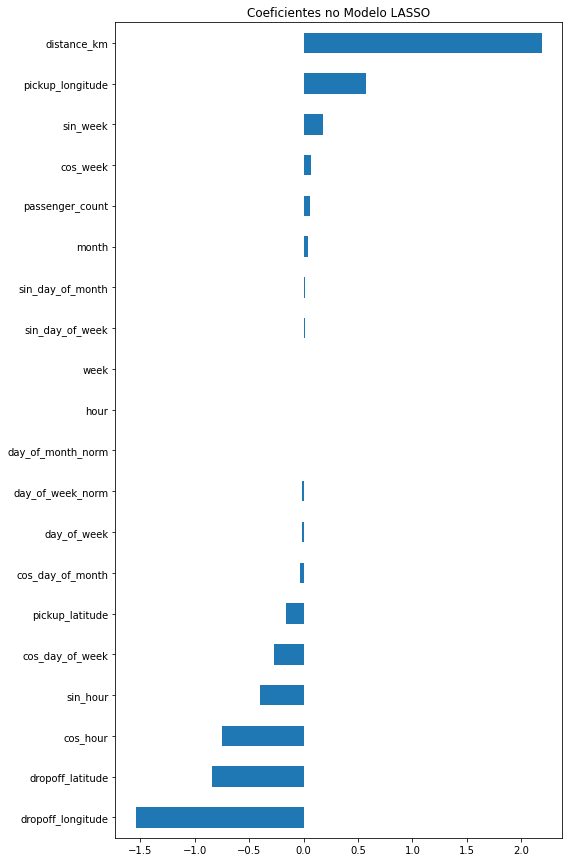

In [16]:
# Coeficientes LASSO - os 10 mais relevantes e menos relevantes para o modelo
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Coeficientes no Modelo LASSO")

In [17]:
coef[coef.sort_values(ascending=False) > 0].sort_values(ascending=False)

distance_km         2.187826
pickup_longitude    0.575470
sin_week            0.179904
cos_week            0.064258
passenger_count     0.055501
month               0.041891
sin_day_of_month    0.010739
sin_day_of_week     0.008291
week                0.006836
hour                0.003300
day_of_month        0.001423
dtype: float64

In [18]:
#### Criando modelo apenas com features relevantes (> 0), segundo modelo LASSO

#LASSO sobre dataset de 1 MM de instancias
X_LASSO = ['distance_km','pickup_longitude','sin_week','cos_week','passenger_count','month','sin_day_of_month',
           'sin_day_of_week','week','hour','day_of_month']

In [19]:
# acrescenta as features selecionadas pelo LASSO na lista de geração de modelos baseline
lst_X.append(X_LASSO)
lst_ml.append('v5_LASSO') 

##### Cria os modelos baseline

In [20]:
lst_rmse = []
lst_r2 = []
lst_rmse, lst_r2 = tools.create_model_baseline(df, lst_X, Y, lst_ml)

Criando modelo baseline - versão: v1_full ...
Calculando RMSE e R2 - versão: v1_full ...
Versão 0 - criada!

Criando modelo baseline - versão: v2_nogeo ...
Calculando RMSE e R2 - versão: v2_nogeo ...
Versão 1 - criada!

Criando modelo baseline - versão: v3_nogeo_cyclical ...
Calculando RMSE e R2 - versão: v3_nogeo_cyclical ...
Versão 2 - criada!

Criando modelo baseline - versão: v4_nogeo_cyclical ...
Calculando RMSE e R2 - versão: v4_nogeo_cyclical ...
Versão 3 - criada!

Criando modelo baseline - versão: v5_LASSO ...
Calculando RMSE e R2 - versão: v5_LASSO ...
Versão 4 - criada!

Concluída criação de modelo baseline !


#### Modelos baselines criados

In [21]:
# colocando as avaliações em formato pandas 
df_baseline = pd.DataFrame(list(zip(lst_ml, lst_X, lst_rmse, lst_r2)),
              columns=['baseline_versao', 'feature', 'rmse', 'r2'])

In [22]:
df_baseline

,baseline_versao,feature,rmse,r2
0,v1_full,"[pickup_longitude, pickup_latitude, dropoff_lo...",4.857350,0.734035
1,v2_nogeo,"[passenger_count, hour, day_of_week, day_of_mo...",4.835332,0.744431
2,v3_nogeo_cyclical,"[passenger_count, hour_norm, cos_hour, sin_hou...",4.856550,0.750994
3,v4_nogeo_cyclical,"[pickup_longitude, pickup_latitude, dropoff_lo...",4.963950,0.764912
4,v5_LASSO,"[distance_km, pickup_longitude, sin_week, cos_...",4.882225,0.748739


In [23]:
# salva avaliação dos modelos baseline
# path
csvFileName = "../data/modelo_baseline_" + str(size_dataset) + "_float" + str(size_float) + "_" + dt.now().strftime("%Y%m%d") + ".csv"
df_baseline.to_csv(csvFileName);

#### Avaliação das métricas
##### RMSE

In [24]:
df_baseline.sort_values('rmse',ascending=False)
# todas versões apresentam o mesmo valor RMSE

,baseline_versao,feature,rmse,r2
3,v4_nogeo_cyclical,"[pickup_longitude, pickup_latitude, dropoff_lo...",4.963950,0.764912
4,v5_LASSO,"[distance_km, pickup_longitude, sin_week, cos_...",4.882225,0.748739
0,v1_full,"[pickup_longitude, pickup_latitude, dropoff_lo...",4.857350,0.734035
2,v3_nogeo_cyclical,"[passenger_count, hour_norm, cos_hour, sin_hou...",4.856550,0.750994
1,v2_nogeo,"[passenger_count, hour, day_of_week, day_of_mo...",4.835332,0.744431


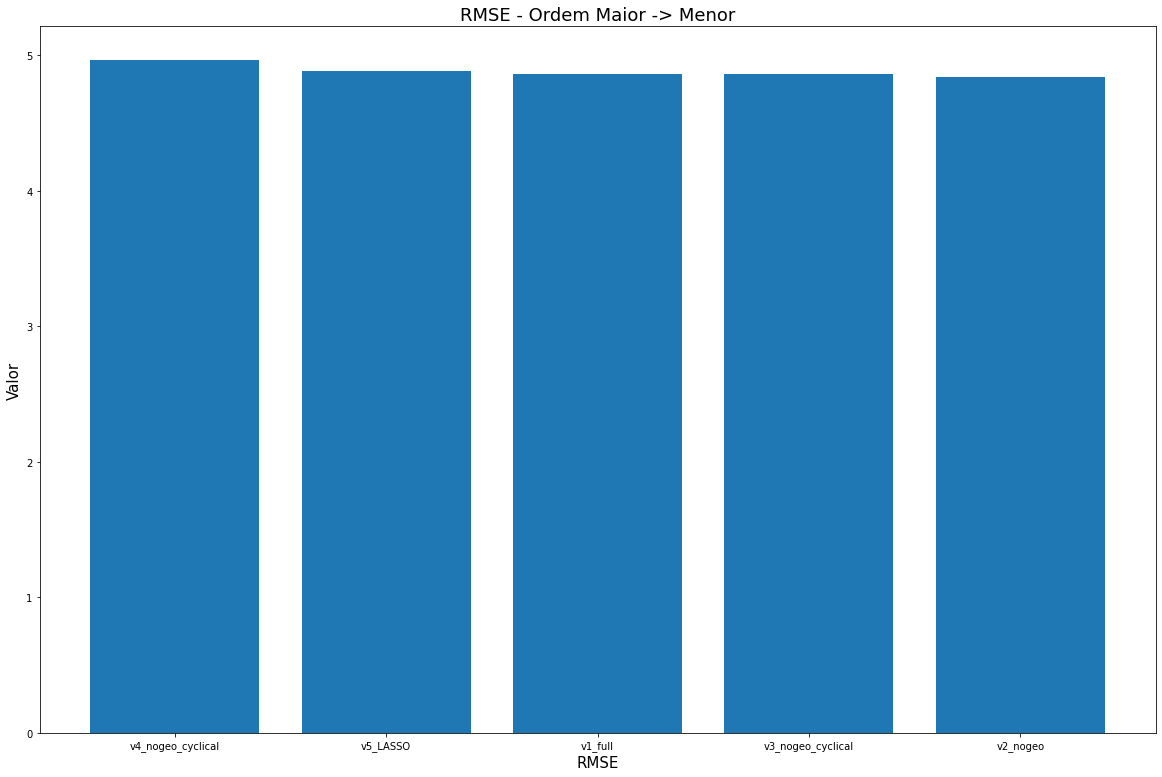

In [25]:
plt.figure(figsize=(20,13))
plt.bar('baseline_versao','rmse',data=df_baseline.sort_values('rmse',ascending=False))
plt.xlabel("RMSE", size=15)
plt.ylabel("Valor", size=15)
plt.title("RMSE - Ordem Maior -> Menor", size=18)
plt.show()

##### R2

In [26]:
df_baseline.sort_values('r2',ascending=False)
# todas versões apresentam o mesmo valor RMSE

,baseline_versao,feature,rmse,r2
3,v4_nogeo_cyclical,"[pickup_longitude, pickup_latitude, dropoff_lo...",4.963950,0.764912
2,v3_nogeo_cyclical,"[passenger_count, hour_norm, cos_hour, sin_hou...",4.856550,0.750994
4,v5_LASSO,"[distance_km, pickup_longitude, sin_week, cos_...",4.882225,0.748739
1,v2_nogeo,"[passenger_count, hour, day_of_week, day_of_mo...",4.835332,0.744431
0,v1_full,"[pickup_longitude, pickup_latitude, dropoff_lo...",4.857350,0.734035


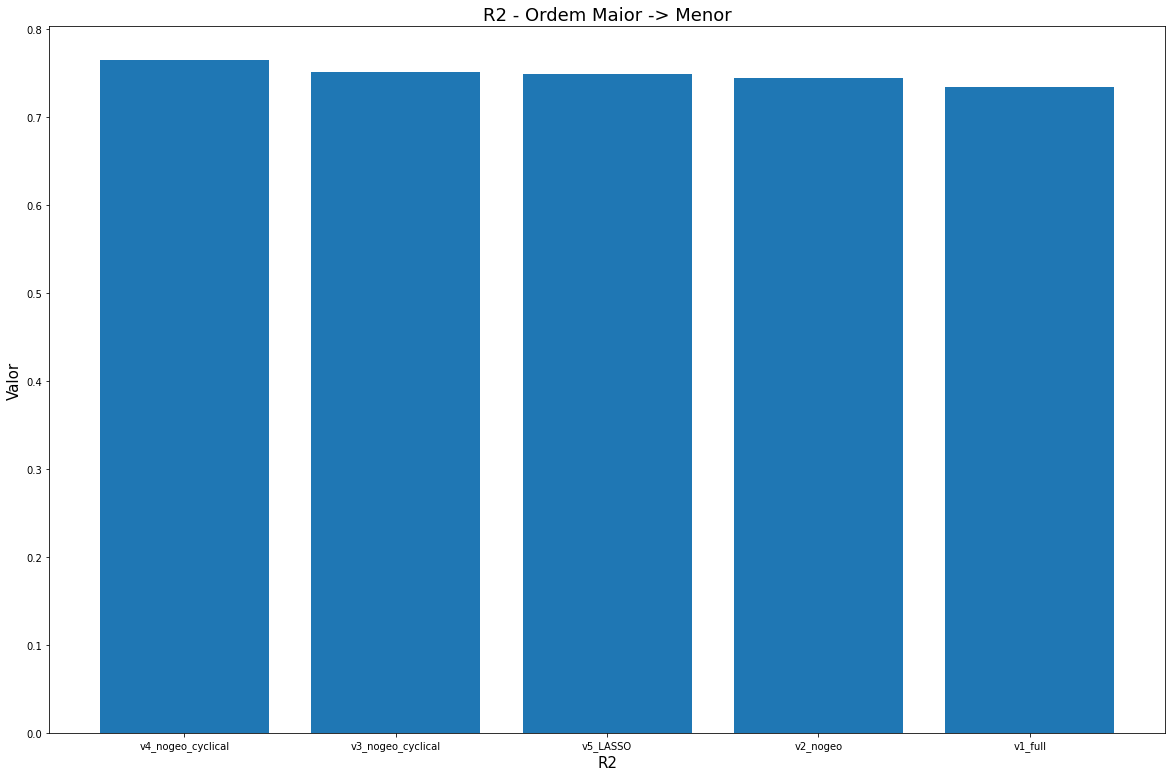

In [27]:
plt.figure(figsize=(20,13))
plt.bar('baseline_versao','r2',data=df_baseline.sort_values('r2',ascending=False))
plt.xlabel("R2", size=15)
plt.ylabel("Valor", size=15)
plt.title("R2 - Ordem Maior -> Menor", size=18)
plt.show()

### Escolhendo modelo baseline para poder ser otimizado usando outros algoritmos de Regressão

In [29]:
# tamanho do dataset
print('Tamanho do dataset: ' + str(size_dataset))

# tamanho do float
print('Tamanho do float: ' + str(size_float))

# Todas as versões apresentaram valores bem próximos, portanto um média destas metricas será usada.
#display(df_baseline.iloc[3])

Tamanho do dataset: 1000000
Tamanho do float: 64


baseline_versao                                    v4_nogeo_cyclical
feature            [pickup_longitude, pickup_latitude, dropoff_lo...
rmse                                                         4.96395
r2                                                          0.764912
Name: 3, dtype: object

In [28]:
# Tamanho do dataset: 1000000
# Tamanho do float: 32
# baseline_versao                                    v4_nogeo_cyclical
# feature            [pickup_longitude, pickup_latitude, dropoff_lo...
# rmse                                                        4.891904
# r2                                                          0.758374


# Tamanho do dataset: 1000000
# Tamanho do float: 64
# baseline_versao                                    v4_nogeo_cyclical
# feature            [pickup_longitude, pickup_latitude, dropoff_lo...
# rmse                                                         4.96395
# r2                                                          0.764912

## Métricas baseline

#### RMSE = 4.96
#### r2 = 0.76

#### A redução do tamanho do float e int não teve perda significativa nas métricas (como era de se esperar), e portanto usarei o formato reduzido para avaliar quaquer outro modelo.

## Achado o modelo baseline vamos avaliar os demais modelos